C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gs" (-> color='g'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()


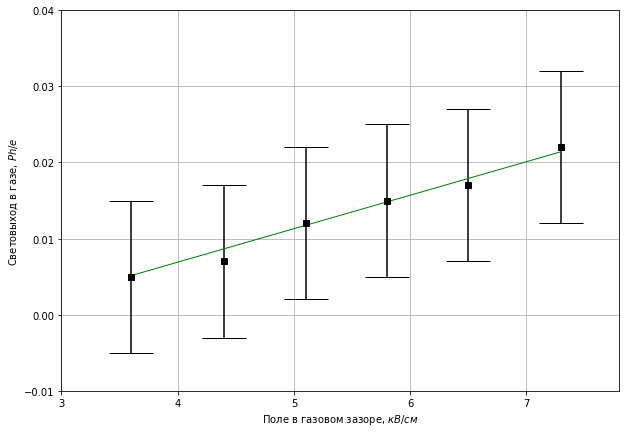

In [27]:
import matplotlib.pyplot as pl

x = [3.6, 4.4, 5.1, 5.8, 6.5, 7.3]
data = [0.005, 0.007, 0.012, 0.015, 0.017, 0.022]
y = [0.0044*i - 0.0107 for i in x]
err=1/(9999**0.5)


pl.figure(num=10, figsize=(10, 7))
#plot(x, [0.0044*i - 0.0107 for i in x], linewidth=1, color ='r')
pl.errorbar(x, data, err, fmt='gs', capsize=22, color = 'black')
pl.plot(x, y, linewidth=1, color ='green')
pl.xlabel(r'Поле в газовом зазоре, $кВ/см$')
pl.ylabel(r'Световыход в газе, $Ph/e$')
#pl.savefig('gr_v1.pdf', bbox_inches='tight', format='pdf')
pl.ylim((-0.01,0.04))
pl.xlim((3,7.8))
pl.grid(True)

In [70]:
import math
import numpy as np

V = [10, 12, 14, 16, 18, 20]                   #подаваемые напряжения
E_g = [i*600/(804*(0.4/1.55+1.8)) for i in V]  #поле в газе
#print(E_g)
Td_g = [i/0.87 for i in E_g]                   #поле в газе(Тд)

E_l = [i*3*40/(4.8*804) for i in V]            #поле в жидкости
#print(E_l)

k_rec = 485+46665/25                           #(kV/cm)
K_att = [0.95/(i**0.8) for i in E_l]
N_i = (8*10**6)*0.6/9                          #общее количество электронов
#rint(N_i)
n = [N_i*0.61*math.exp(-K_att[i]*4.8*2*0.001)/(1+k_rec/1000/E_l[i]) for i in range (0,6)]   #n_e
#print(n)

N_n= [0.005, 0.007, 0.012, 0.015, 0.017, 0.022]#N(pe/e)

N_pe = [N_n[i]*n[i] for i in range (0,6)]      #N(pe)
print(N_pe)

[185.6100748436149, 305.6696026297946, 599.090647216182, 838.6688482315316, 1047.96240061012, 1477.0898418342308]


In [71]:
import numpy as np
#20kV
K = [(980 - 820)*50/2, (710-570)*25,(480-320)*25,(500-340)*25, 180*25, (980-830)*25, (950-810)*25, (400-260)*35, (380-240)*25, (950-810)*25]
K_mean = int(np.mean(K))
print(K_mean)  #коэффициент перевода

3915


In [72]:
Sav = [N_pe[i]*K_mean for i in range (0, 6)]  #средний световыход за событие в отн. ед.
print(Sav)

[726663.4430127523, 1196696.494295646, 2345439.8838513526, 3283388.540826446, 4102772.79838862, 5782806.730781014]


C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gs" (-> color='g'). The keyword argument will take precedence.
  


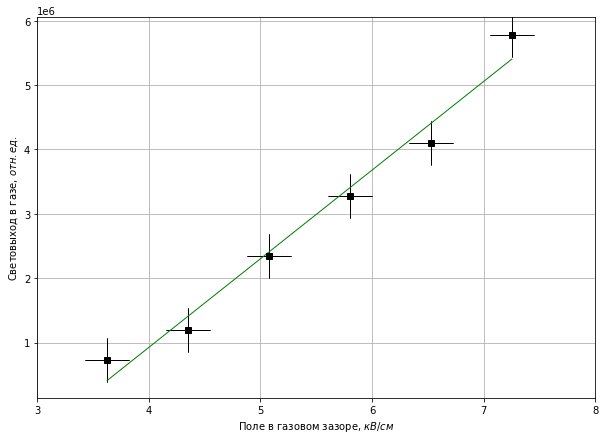

In [74]:
import matplotlib.pyplot as pl

y = [np.polyfit(E_g,Sav,1)[0]*E_g[i]+np.polyfit(E_g,Sav,1)[1] for i in range (0, 6)]

e = 1/(9999**0.5)

pl.figure(num=10, figsize=(10, 7))
pl.errorbar(E_g, Sav, xerr = 0, yerr = e, fmt='gs', capsize=22, color = 'black')
#pl.errorbar(x, data, err, fmt='gs', capsize=22, color = 'black')
pl.plot(E_g, y, linewidth=1, color ='green')
pl.xlabel(r'Поле в газовом зазоре, $кВ/см$')
pl.ylabel(r'Световыход в газе, $отн. ед.$')
#pl.ylim((0,13))
pl.xlim((3,8))
pl.grid(True)

In [47]:
print(E_g)

[3.6260702755813408, 4.351284330697609, 5.076498385813877, 5.801712440930145, 6.526926496046413, 7.2521405511626815]


C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gs" (-> color='g'). The keyword argument will take precedence.
  import sys


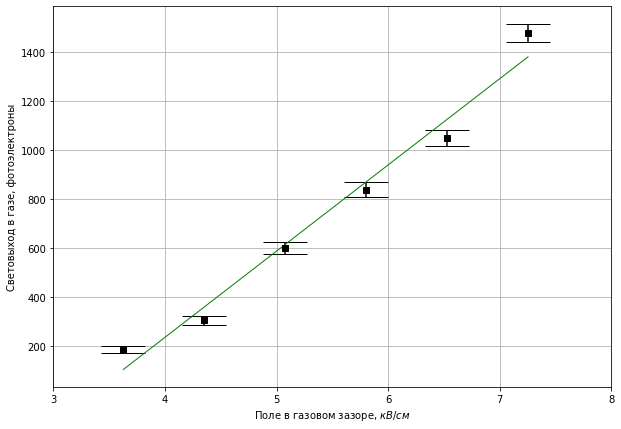

In [88]:
y_1 = [np.polyfit(E_g,N_pe,1)[0]*E_g[i]+np.polyfit(E_g,N_pe,1)[1] for i in range (0, 6)]

N_np = np.array(N_pe)
e = N_np**0.5

pl.figure(num=10, figsize=(10, 7))
pl.errorbar(E_g, N_pe, yerr = e, fmt='gs', capsize=22, color = 'black')
#pl.errorbar(x, data, err, fmt='gs', capsize=22, color = 'black')
pl.plot(E_g, y_1, linewidth=1, color ='green')
pl.xlabel(r'Поле в газовом зазоре, $кВ/см$')
pl.ylabel(r'Световыход в газе, фотоэлектроны')
#pl.ylim((0,13))
pl.xlim((3,8))
pl.grid(True)